In [1]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [38]:
df = yf.download('XRP-USD', start='2015-01-01', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
1,2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2,2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
3,2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
4,2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000
...,...,...,...,...,...,...,...
1873,2022-12-26,0.346383,0.369103,0.345969,0.365723,0.365723,797909103
1874,2022-12-27,0.365728,0.372270,0.359441,0.368126,0.368126,905248563
1875,2022-12-28,0.368122,0.368543,0.356136,0.356531,0.356531,839617676
1876,2022-12-29,0.356524,0.357225,0.338911,0.342846,0.342846,898022518


In [39]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
1868,2022-12-21,0.346020
1869,2022-12-22,0.349600
1870,2022-12-23,0.354273
1871,2022-12-24,0.352179
1872,2022-12-25,0.346392
1873,2022-12-26,0.365723
1874,2022-12-27,0.368126
1875,2022-12-28,0.356531
1876,2022-12-29,0.342846
1877,2022-12-30,0.345017


In [40]:
df = df[:-1]
df

,ds,y
0,2017-11-09,0.217488
1,2017-11-10,0.206483
2,2017-11-11,0.210430
3,2017-11-12,0.197339
4,2017-11-13,0.203442
...,...,...
1872,2022-12-25,0.346392
1873,2022-12-26,0.365723
1874,2022-12-27,0.368126
1875,2022-12-28,0.356531


In [41]:
!pip install NeuralProphet
from neuralprophet import NeuralProphet
from matplotlib import pyplot as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
m = NeuralProphet()
m.fit(df, freq='D', epochs=100)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.947% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.947% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: 

Finding best initial lr:   0%|          | 0/232 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,1.038376,1.266451,0.432637,0.0,0
1,0.988956,1.219034,0.400741,0.0,1
2,0.911732,1.129558,0.353390,0.0,2
3,0.799983,1.008456,0.286967,0.0,3
4,0.652888,0.841791,0.201946,0.0,4
...,...,...,...,...,...
95,0.132610,0.211193,0.014131,0.0,95
96,0.132944,0.213596,0.014198,0.0,96
97,0.132429,0.214349,0.014103,0.0,97
98,0.132916,0.215150,0.014230,0.0,98


In [43]:
future = m.make_future_dataframe(df, periods=120)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.947% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.947% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 59it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-30,None,0.301911,0.225132,0.078130,-0.001352
1,2022-12-31,None,0.303448,0.223454,0.077073,0.002921
2,2023-01-01,None,0.297706,0.221775,0.075655,0.000276
3,2023-01-02,None,0.296247,0.220097,0.073895,0.002255
4,2023-01-03,None,0.290319,0.218419,0.071813,0.000087


In [44]:
future.tail()

,ds,y
115,2023-04-24,None
116,2023-04-25,None
117,2023-04-26,None
118,2023-04-27,None
119,2023-04-28,None


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


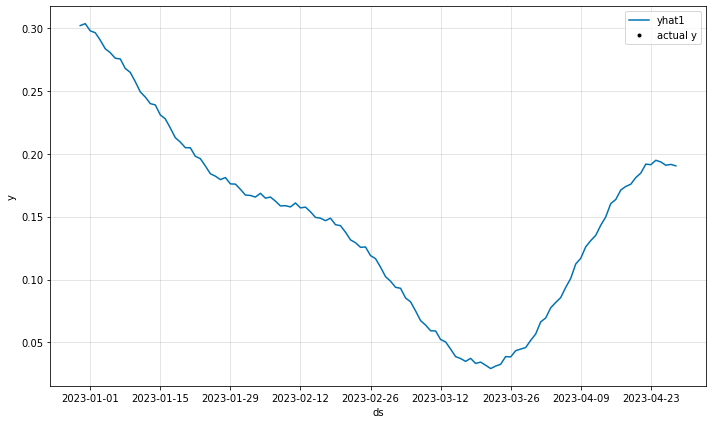

In [45]:
plot1 = m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


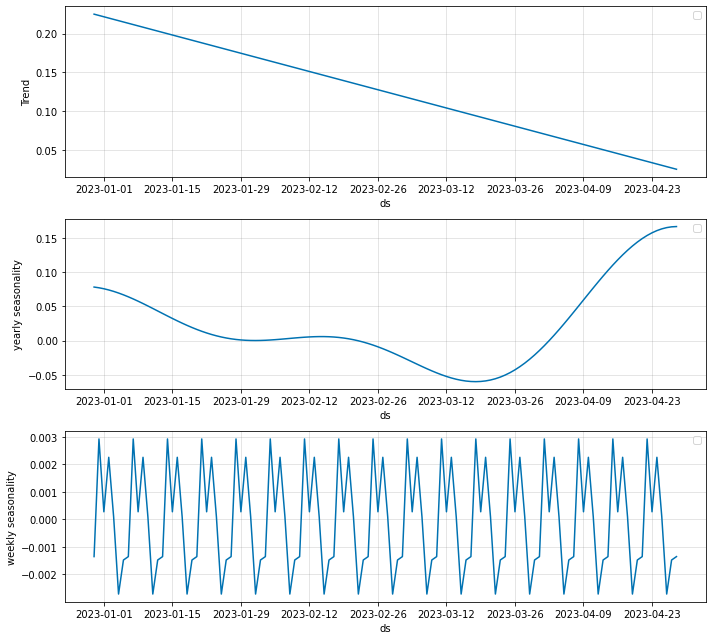

In [46]:
plot2 = m.plot_components(forecast)